In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('/home/ruairi/data/tmp/perfection_talk.csv')

/home/ruairi/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df[(df['response']!='excluded')]

In [4]:
def normalise2(df):
    return df.groupby('neuron_id')['firing_rate'].apply(lambda x: 
                                                        x.divide(np.mean(x.iloc[:len(x)//2])).multiply(100))

In [5]:
acute = df[df['group_id'].isin([1, 2, 3, 4])].copy()
acute = acute[acute['time'] > -20].copy()
acute['normalised'] = normalise2(acute)

In [11]:
c_cit = acute[acute['group_id']==2].copy()

#c_sal = acute[(acute['group_id']==4) & (acute['response']=='decrease')].copy()
#c_sal.loc[(c_sal['time'] < 0) & (c_sal['normalised'] > 150), 'normalised'] -= 40
#c_sal.loc[(c_sal['time'] < 0) & (c_sal['normalised'] < 60), 'normalised'] += 40

c_sal2 = acute[(acute['group_id']==1) & (acute['response']=='decrease')].copy()
c_sal3 = c_sal = acute[(acute['group_id']==3)].copy()


c_cit['group'] = 'NAIVE + SAL'
c_sal2['group'] = 'NAIVE + CIT [Decreasers]'
c_sal['group'] = 'CHRONIC CIT + CIT'


tmp = pd.concat([c_cit, c_sal2, c_sal])

In [7]:
tmp.group.unique()

array(['NAIVE + SAL', 'NAIVE + [Decreasers]'], dtype=object)

/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


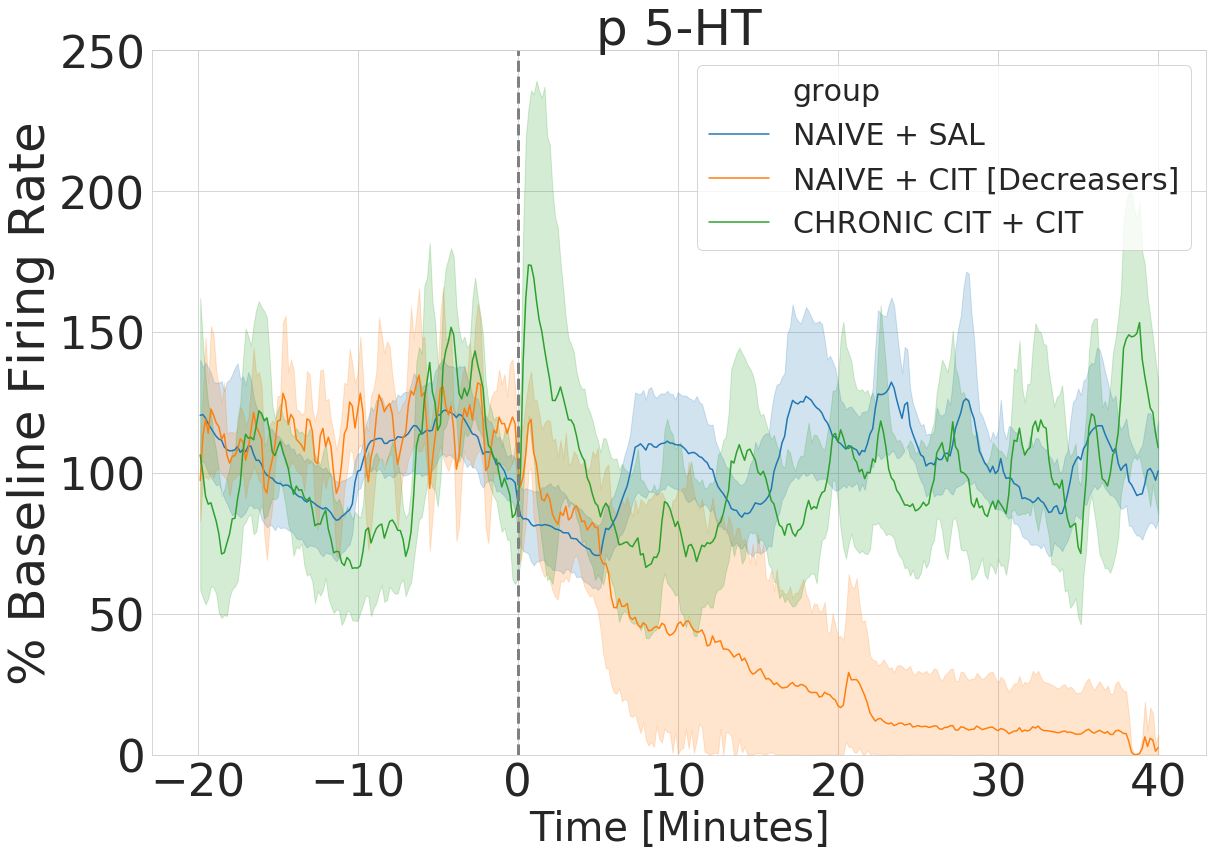

In [12]:
f, a = plt.subplots(figsize=(17, 12))


sns.lineplot(data=tmp[tmp["label"]=='p 5-HT'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':50})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':40})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(45) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(45)
a.legend(loc=0, prop={'size': 30})
a.set_title('p 5-HT', fontdict={'fontsize': 50})
a.set_ylim([0, 250])
plt.tight_layout()
plt.savefig('/home/ruairi/data/figures/talk/line_ALLp-5HT.png', dpi=300)

/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


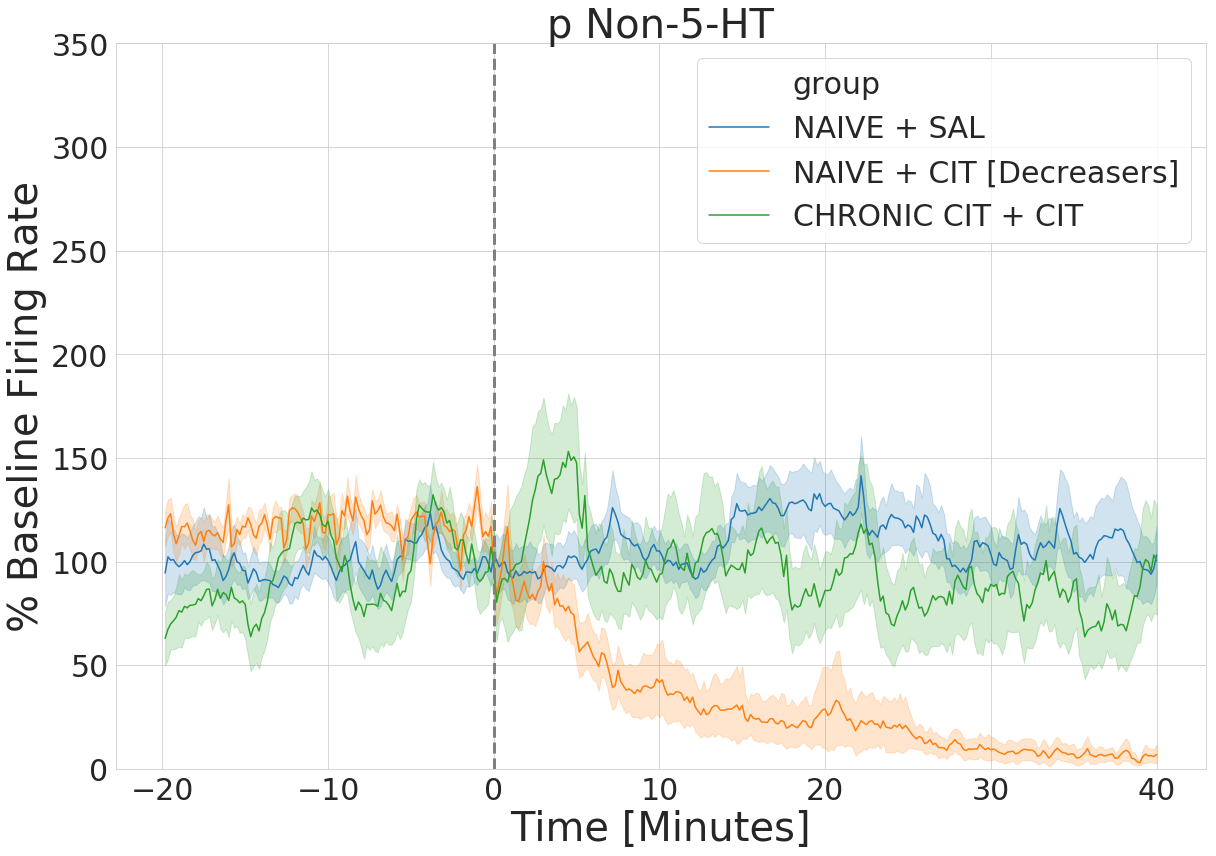

In [13]:
f, a = plt.subplots(figsize=(17, 12))


sns.lineplot(data=tmp[tmp["label"]=='p Non-5-HT'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a, ci=80)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':40})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':40})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
a.legend(loc=0, prop={'size': 30})
a.set_title('p Non-5-HT', fontdict={'fontsize': 40})
a.set_ylim([0, 350])
plt.tight_layout()
plt.savefig('/home/ruairi/data/figures/talk/line_ALLp-Non-5-HT.png', 
            dpi=300)

/home/ruairi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


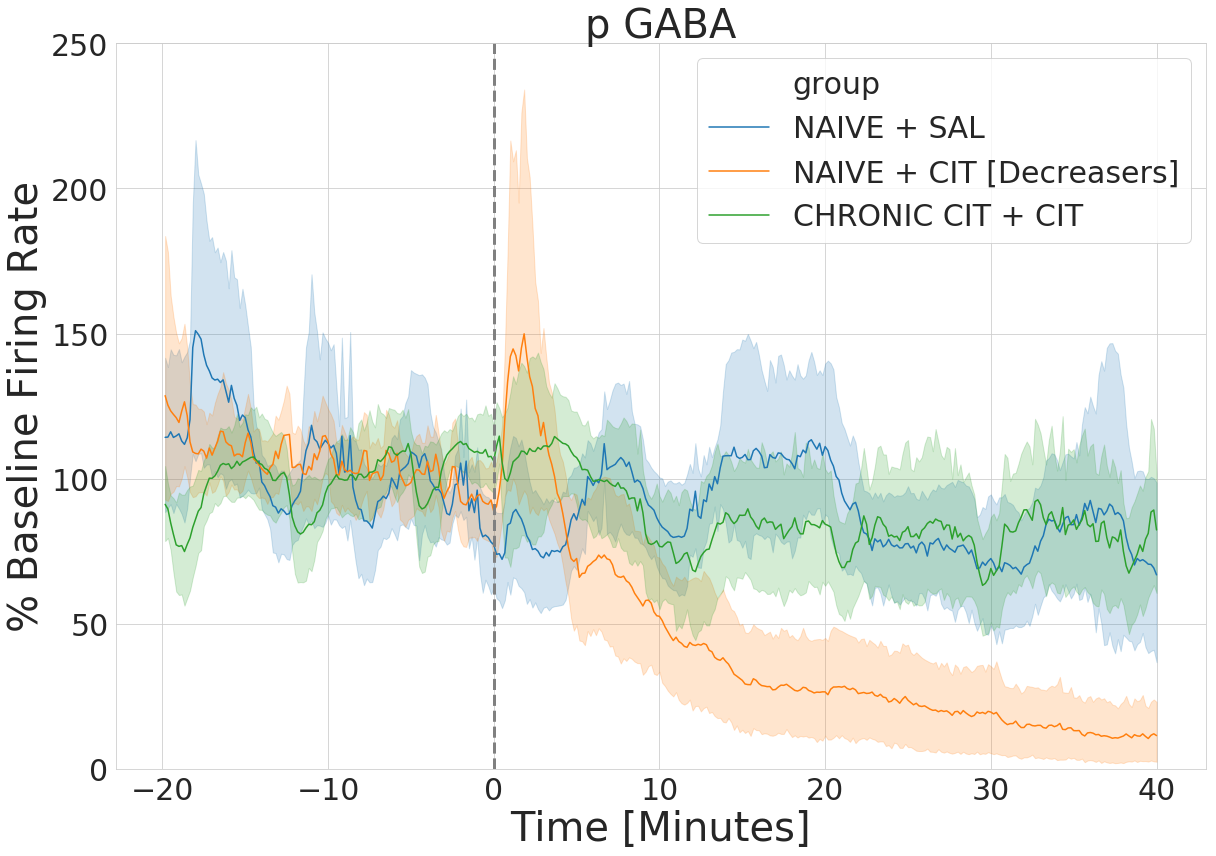

In [14]:
f, a = plt.subplots(figsize=(17, 12))


sns.lineplot(data=tmp[tmp["label"]=='p GABA'], 
                     x='time', y='normalised', 
                     hue='group',
                     ax=a)

a.set_ylabel('% Baseline Firing Rate', fontdict={'fontsize':40})
a.set_xlabel('Time [Minutes]', fontdict={'fontsize':40})
a.axvline(0, linewidth=3, linestyle='--', color='grey')
for tick in a.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in a.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
a.legend(loc=0, prop={'size': 30})
a.set_title('p GABA', fontdict={'fontsize': 40})
a.set_ylim([0, 250])
plt.tight_layout()
plt.savefig('/home/ruairi/data/figures/talk/line_ALLp-GABA.png', 
            dpi=300)

In [16]:
data = np.random.randn(100, 100) * 3.2

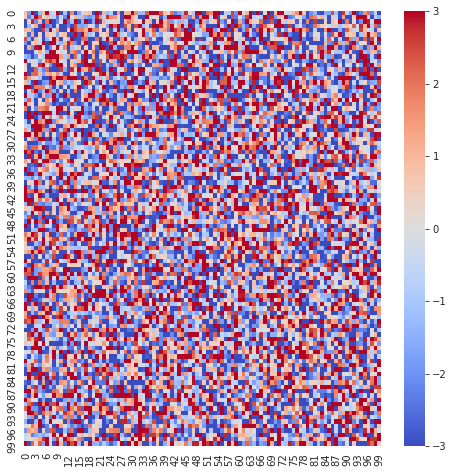

In [22]:
import seaborn as sns

f, a = plt.subplots(figsize=(8, 8))
a = sns.heatmap(data, cmap='coolwarm', vmin=-3, vmax=3)
plt.savefig('/home/ruairi/data/figures/talk/colormap.png', dpi=300)